# Ujian Akhir Semester Artificial Intelligence

### Nama : Masayu Nadila Maharani
### NIM : 09011181823023
### Kelas : SK5A Indralaya

## Klasifikasi dataset iris menggunakan metode Support Vector Machine (SVM)

#### Support Vector Machine
Support vector machine (SVM) adalah salah satu metode yang biasanya digunakan untuk klasifikasi, dan juga merupakan salah satu metode yang sangat baik untuk klasifikasi data, namun datanya terbatas. Dalam pemodelan klasifikasi, SVM memiliki konsep yang lebih jelas secara matematis dibandingkan dengan teknik-teknik klasifikasi lainnya. SVM juga dapat mengatasi masalah klasifikasi dan regresi dengan linear maupun non linear.

#### Import Library
itertools mencakup sekumpulan fungsi yang bekerja dengan iterable

Numpy adalah library python yang fokus pada scientific computing. Penggunaan as disini artinya kita menggantikan pemanggilan numpy dengan prfix np untuk proses berikutnya.

Matplotlib digunakan untuk membantu menyusun informasi sehingga data dapat divisualisasikan agar mudah dipahami

pandas adalah library python yang fous pada proses analisis data seperti manipulasi data, persiapan data dan pembersihan data. panda juga memadukan library numpy yang memiliki kemampuan manipulasi data yang fleksibel dengan database relasional (seperti SQL)

scipy.optimize ini menyediakan beberapa algoritme pengoptimalan yang umum digunakan.

sklearn digunakan untuk membantu dalam mengolah data yang akan disegmentasikan

In [1]:
#Import semua library yang akan digunakan
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import scipy.optimize as opt
import pylab as pl
from sklearn import preprocessing
from matplotlib.ticker import NullFormatter
from sklearn.model_selection import train_test_split

Dataset yang digunakan ini ialah dataset iris atau data bunga iris Data bunga iris ini ada 3 jenis/spesies yaitu : sentosa, versicolor dan virginica

In [2]:
#import dataset
df = pd.read_csv('E:/SEMESTER 5/UTS AI/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


Dari data diatas maka dapat dilihat bahwa terdapat 150 entri data dengan total 6 kolom serta ada tipe data float, int dan tipe data object. ada 4 yang bertipe data float, 1 bertipe data int serta 1 bertipe data object.

In [5]:
#deskripsikan data untuk melihat informasi seperti berapa rata-ratanya dengan perintah
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df [['PetalWidthCm','PetalLengthCm','SepalWidthCm','SepalLengthCm']].mean()

PetalWidthCm     1.198667
PetalLengthCm    3.758667
SepalWidthCm     3.054000
SepalLengthCm    5.843333
dtype: float64

## 1. Visualisasi data

Visualisasi data atau sata visualization merupakan rangkaian proses menampilkan data atau informasi dalam bentuk yang mudah dipahami oleh orang awam, seperti grafik, angka dan lain sebagainya. Tujuan visualisasi data ini tentunya untuk mempermudah melihat dan memahami pola.

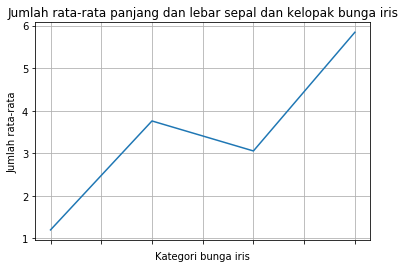

In [7]:
rata_iris = df[['PetalWidthCm','PetalLengthCm','SepalWidthCm','SepalLengthCm']].mean()
rata_iris.plot()
plt.xlabel("Kategori bunga iris")
plt.ylabel("Jumlah rata-rata")
plt.title("Jumlah rata-rata panjang dan lebar sepal dan kelopak bunga iris")
plt.grid()
plt.show()

## Pembagian data

pembagian data ini dilakukan untuk membagi mana data float,int dan juga object

In [8]:
#x untuk angkanya
x = df[['PetalWidthCm','PetalLengthCm','SepalWidthCm','SepalLengthCm']].values
x[0:5]

array([[0.2, 1.4, 3.5, 5.1],
       [0.2, 1.4, 3. , 4.9],
       [0.2, 1.3, 3.2, 4.7],
       [0.2, 1.5, 3.1, 4.6],
       [0.2, 1.4, 3.6, 5. ]])

In [9]:
#y untuk pengkategoriannya berdasarkan kelasnya dan ubah y ke numeric
y = df[['Species']]
kategori = preprocessing.LabelEncoder()
kategori.fit(["Iris-setosa","Iris-versicolor","Iris-virginica"])
#0 untuk kategori setosa
#1 untuk kategori versicolor
#2 untuk kategori virginica
y = kategori.transform(y)
y[0:10]

E:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
#sebelum dijadikan training dan test x di normalisasi
normx = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
print(normx)

[[-1.31297673e+00 -1.34127240e+00  1.03205722e+00 -9.00681170e-01]
 [-1.31297673e+00 -1.34127240e+00 -1.24957601e-01 -1.14301691e+00]
 [-1.31297673e+00 -1.39813811e+00  3.37848329e-01 -1.38535265e+00]
 [-1.31297673e+00 -1.28440670e+00  1.06445364e-01 -1.50652052e+00]
 [-1.31297673e+00 -1.34127240e+00  1.26346019e+00 -1.02184904e+00]
 [-1.05003079e+00 -1.17067529e+00  1.95766909e+00 -5.37177559e-01]
 [-1.18150376e+00 -1.34127240e+00  8.00654259e-01 -1.50652052e+00]
 [-1.31297673e+00 -1.28440670e+00  8.00654259e-01 -1.02184904e+00]
 [-1.31297673e+00 -1.34127240e+00 -3.56360566e-01 -1.74885626e+00]
 [-1.44444970e+00 -1.28440670e+00  1.06445364e-01 -1.14301691e+00]
 [-1.31297673e+00 -1.28440670e+00  1.49486315e+00 -5.37177559e-01]
 [-1.31297673e+00 -1.22754100e+00  8.00654259e-01 -1.26418478e+00]
 [-1.44444970e+00 -1.34127240e+00 -1.24957601e-01 -1.26418478e+00]
 [-1.44444970e+00 -1.51186952e+00 -1.24957601e-01 -1.87002413e+00]
 [-1.31297673e+00 -1.45500381e+00  2.18907205e+00 -5.25060772e

Normalisasi data ini digunakan untuk meminimalkan redudansi data pada suatu data agar data tersebut dapat bekerja dengan optimal.


#### Training set 
Training set adalah bagian dari dataset untuk membuat prediksi atau menjalankan fungsi dari sebuah algoritma Machine learning. 
#### Test set
Test set adalah bagian dari dataset yang kita tes untuk melihat keakuratannya, atau dengan kata lain melihat performanya.


In [11]:
#jadikan training dan test
#disini menggunakan 80 : 20, dimana 80 untuk training dan sisanya 20 untuk test
xtrain, xtest, ytrain, ytest = train_test_split(normx, y, test_size = 0.2, random_state = 4)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)
#shape ini berfungsi untuk melihat dimensi data

(120, 4) (120,)
(30, 4) (30,)


In [12]:
#disini klasifikasi menggunakan SVM
from sklearn import svm
klasifikasi = svm.SVC(kernel='linear')
klasifikasi.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Prediksi merupakan sebuah fungsi bagaimana sebuah proses nantinya akan menemukan pola tertentu dari suatu data. Pola-pola tersebut dapat diketahui dari berbagai variabel-variabel yang ada pada data. 

In [13]:
#Proses prediksi klasifikasi 
ypredict = klasifikasi.predict(xtest)
ypredict[0:5]

array([2, 0, 2, 2, 2], dtype=int64)

### Confucion Matrix
confusion matrix adalah suatu metode yang biasanya digunakan untuk melakukan perhitungan akurasi pada konsep data mining. confusion matrix juga sering disebut dengan error matrix. pada dasarnya confusin matrix memberikan informasi perbandingan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi sebenarnya.

In [14]:
#membuat confusion matrix 
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        16
          1       0.75      0.60      0.67         5
          2       0.80      0.89      0.84         9

avg / total       0.90      0.90      0.90        30

Confusion matrix, without normalization
[[16  0]
 [ 0  3]]


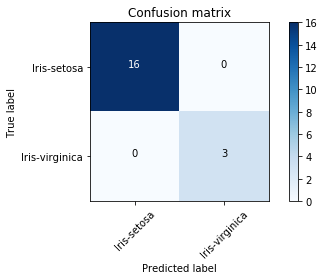

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cnf_matrix = confusion_matrix(ytest, ypredict, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(ytest, ypredict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Iris-setosa','Iris-virginica'],normalize= False,  title='Confusion matrix')

In [16]:
from sklearn.metrics import f1_score
f1_score(ytest, ypredict, average='weighted')
#f1 skor untuk melihat hasil akurasi klasifikasi

0.8970760233918128

In [17]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(ytest, ypredict)
#dan ini untuk melihat skor kemiripan

0.9